In [1]:
# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\Entri-Data Science Notes\spam_ham_dataset.csv\spam_ham_dataset.csv")  

# Display the first few rows of the dataset to get an overview
df.head()c


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
# Display basic information about the dataset
df.info()

# Display the first few rows, specifically the 'text' and 'label' columns
df[['text', 'label']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham


<AxesSubplot:title={'center':'Label Distribution'}>

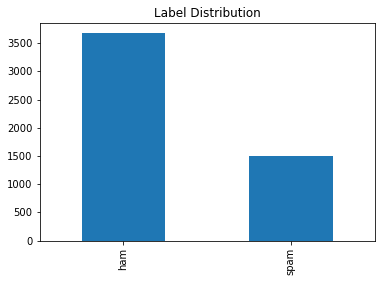

In [3]:
# Check unique values and their counts in the 'label' column
df['label'].value_counts().plot(kind='bar', title='Label Distribution')


In [4]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'label'], axis=1)

# Display the first few rows after dropping columns
df.head()


,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
#The Naive Bayes model

In [6]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=42)

# Converting text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Making predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [7]:
#The overall accuracy and class-specific metrics indicate that the Naive Bayes model is performing well on the test set

In [8]:
# Display an example of a spam email
spam_example = df[df['label_num'] == 1]['text'].iloc[0]
print("Example of a Spam Email:")
print(spam_example)

# Display an example of a ham email
ham_example = df[df['label_num'] == 0]['text'].iloc[0]
print("\nExample of a Ham Email:")
print(ham_example)


Example of a Spam Email:
Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin


Example of a Ham Email:
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [9]:
import random

# Displaying a random sample of a spam email
random_spam_example = df[df['label_num'] == 1]['text'].sample(random_state=42).iloc[0]
print("Random Sample of a Spam Email:")
print(random_spam_example)

# Displaying a random sample of a ham email
random_ham_example = df[df['label_num'] == 0]['text'].sample(random_state=42).iloc[0]
print("\nRandom Sample of a Ham Email:")
print(random_ham_example)


Random Sample of a Spam Email:
Subject: liffe is great
hello ,
vlsit our medsbymail shop and save over 80 %
vl
raam
enle
racl
is ,
and
ag
bi
vlt
al
manyother .
you will be pieasantly surprised with our prlces !
have a nice day .

Random Sample of a Ham Email:
Subject: conoco - big cowboy
darren :
i ' m not sure if you can help me with this , but i don ' t know who else to ask . for april and may , we have gas pathed on deal 133304 to conoco at the gepl big cowboy point . conoco is saying that we did not buy that gas from them . they have accounted for all of the hpl big cowboy gas and think we have over paid by about $ 1 . 5 mil each month for the gepl gas . do you know why we added the gepl meter to the deal in april ? could we have bought this gas from someone else ? i have the meter statements from tejas , but they do not say who the supply company was .
megan


In [10]:
#The Random Forest model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['label_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer for feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, rf_predictions)
report_rf = classification_report(y_test, rf_predictions)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:\n', report_rf)


Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.97      0.91      0.94       293

    accuracy                           0.97      1035
   macro avg       0.97      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [12]:
#The overall accuracy and class-specific metrics indicate that the Random Forest model is performing well on the test set

In [13]:
#The Logistic Regression model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['label_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer for feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
lr_predictions = lr_classifier.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, lr_predictions)
report_lr = classification_report(y_test, lr_predictions)

print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Logistic Regression Classification Report:\n', report_lr)


Logistic Regression Accuracy: 0.98
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [15]:
#The high accuracy and F1-scores indicate that the Logistic Regression model is effective in distinguishing between spam and non-spam emails. The precision, recall, and F1-score values are well-balanced, suggesting good overall performance.

In [16]:
#The Support Vector Machine (SVM)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['label_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer for feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, svm_predictions)
report_svm = classification_report(y_test, svm_predictions)

print(f'Support Vector Machine Accuracy: {accuracy_svm:.2f}')
print('Support Vector Machine Classification Report:\n', report_svm)


Support Vector Machine Accuracy: 0.99
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [18]:
#The Support Vector Machine (SVM) achieved accuracy of 0.99 on the dataset.